# Notebook Structure

1. Problem Statement and Data Description
2. Loading Datasets and Libraries
3. Understanding and Validating the Data
4. Data Exploration - Train, Product, Store 

# 1. Problem Statement and Data Description

**Problem Statement:** 
objective is to predict the flight prices using that data.

**Data Description:**

Train Data- 
- **Airline** - The name of the airline
- **source** - The date of the journey
- **Destination** - The destination where the service ends.
- **Route** - The route taken by the flight to reach the destination.
- **Dep_Time** - The time when the journey starts from the source
- **Arrival_Time** - Time of arrival at the destination.
- **Duration** - Total duration of the flight.
- **Total_Stops** - Total stops between the source and destination.
- **Additional_Info** - Additional information about the flight
- **Price** - Target, The price of the ticket()

# 2. Loading Required Libraries and Datasets

In [271]:
import seaborn as sns
import pandas as pd
import numpy as np
import random

sns.set_context('notebook',font_scale=1.5)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [272]:
# reading the data files
train = pd.read_csv('train.csv')


In [273]:
# checking the size of the dataframes
train.shape

(8012, 11)

# 3. Understanding and Validating Data

In [274]:
# Size od data
train.shape

(8012, 11)

In [275]:
### Train Data
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


## Data Insight Report

In [276]:
# Define Utiliy Functions
def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')

In [277]:
data_insights_report(train) # This report gives as view of the data, its metrics and basic actionable Insights

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,Airline,object,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date_of_Journey,object,44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source,object,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Destination,object,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Route,object,122,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dep_Time,object,219,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arrival_Time,object,1182,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Duration,object,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Total_Stops,object,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Additional_Info,object,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Date_of_Journey has the data type object, but its a datetime variable 

#### Datetime variable 

- The date of journey
- Is there any rescheduled date due to delay in take off?

#### Numerical Variables

- Check the distribution of numerical variables
- Are there any extreme values?
- Are there any missing values in the variables?

#### Categorical Variables

- Check the unique values for categorical variables
- Are there any missing values in the variables?
- Is there any variable with high cardinality/ sparsity?


In [278]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [279]:
train.dropna(inplace = True)

In [280]:
train['Date_of_Journey'] = pd.DatetimeIndex(train['Date_of_Journey'])

In [281]:
train_new = train.groupby('Date_of_Journey')['Price'].sum().reset_index()

In [282]:
#furniture = furniture.set_index('Order Date')
#furniture.index
train_new = train_new.set_index('Date_of_Journey')
train_new.index

DatetimeIndex(['2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-15', '2019-03-18', '2019-03-21', '2019-03-24',
               '2019-03-27', '2019-04-15', '2019-04-18', '2019-04-21',
               '2019-04-24', '2019-04-27', '2019-05-15', '2019-05-18',
               '2019-05-21', '2019-05-24', '2019-05-27', '2019-06-03',
               '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-15',
               '2019-06-18', '2019-06-21', '2019-06-24', '2019-06-27',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06'],
              dtype='datetime64[ns]', name='Date_of_Journey', freq=None)

In [283]:
train_new.dropna(inplace = True)

In [284]:
#y = furniture['Sales'].resample('MS').mean()
y = train_new['Price'].resample('MS').mean()

In [285]:
y['2019':]

Date_of_Journey
2019-01-01    2.109616e+06
2019-02-01             NaN
2019-03-01    1.509211e+06
2019-04-01    3.298594e+05
2019-05-01    2.921255e+06
2019-06-01    1.944756e+06
2019-07-01             NaN
2019-08-01             NaN
2019-09-01    2.551492e+06
2019-10-01             NaN
2019-11-01             NaN
2019-12-01    1.652966e+06
Freq: MS, Name: Price, dtype: float64

In [286]:
y['2019':]

Date_of_Journey
2019-01-01    2.109616e+06
2019-02-01             NaN
2019-03-01    1.509211e+06
2019-04-01    3.298594e+05
2019-05-01    2.921255e+06
2019-06-01    1.944756e+06
2019-07-01             NaN
2019-08-01             NaN
2019-09-01    2.551492e+06
2019-10-01             NaN
2019-11-01             NaN
2019-12-01    1.652966e+06
Freq: MS, Name: Price, dtype: float64

## Data Visualization

## Visualizing Furniture Sales Time Series Data

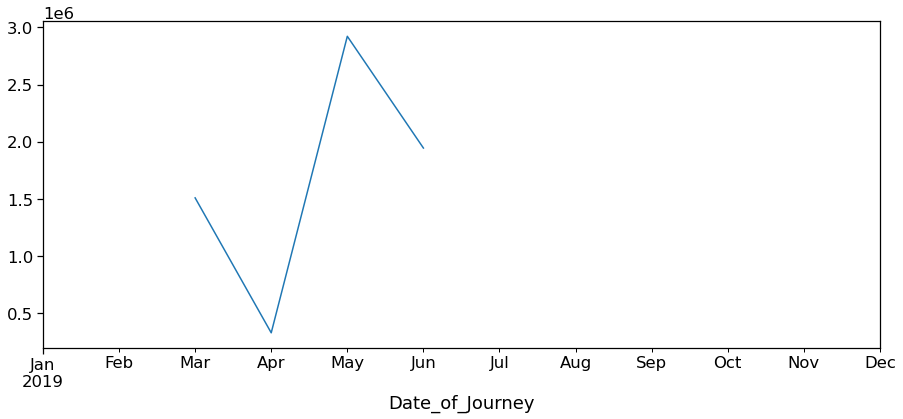

In [287]:
y.plot(figsize=(15, 6))
plt.show()

In [288]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,2019-06-18,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


## Flight Vs Price

[Text(0, 0, 'Airline C'),
 Text(0, 0, 'Airline A'),
 Text(0, 0, 'Airline E'),
 Text(0, 0, 'Airline G'),
 Text(0, 0, 'Airline B'),
 Text(0, 0, 'Airline D'),
 Text(0, 0, 'Airline F'),
 Text(0, 0, 'Airline I'),
 Text(0, 0, 'Airline H'),
 Text(0, 0, 'Airline J'),
 Text(0, 0, 'Airline K'),
 Text(0, 0, 'Airline L')]

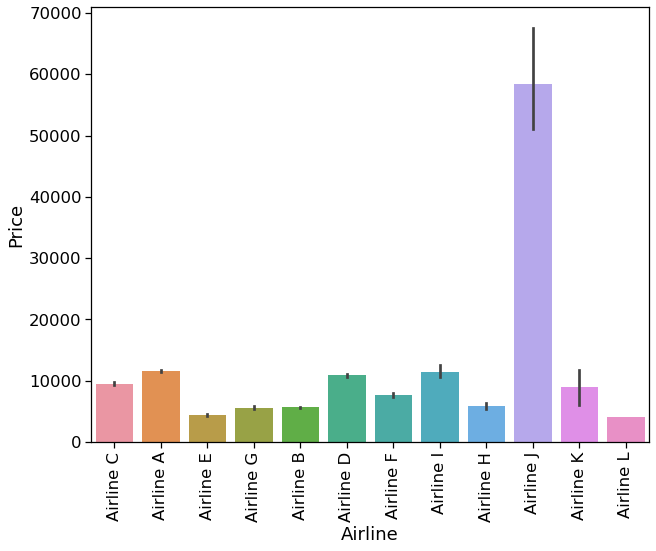

In [289]:

plt.figure(figsize = (10, 8))
chart=sns.barplot(x='Airline',y='Price',data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

- Airline J and Airline J has maximum Price rate

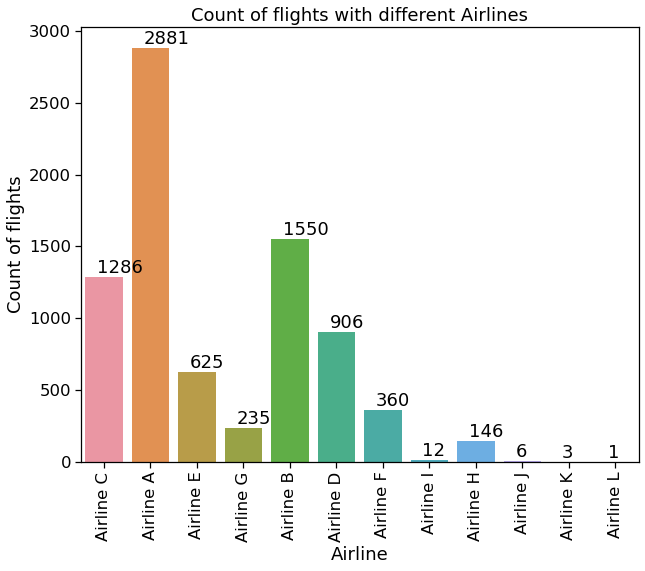

In [290]:
plt.figure(figsize = (10, 8))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

- There are more number of flights of Airline A.

- Airline I,Airline J, Airline K, Airline L have actually almost negligible flights.

[Text(0, 0, 'Airline C'),
 Text(0, 0, 'Airline A'),
 Text(0, 0, 'Airline E'),
 Text(0, 0, 'Airline G'),
 Text(0, 0, 'Airline B'),
 Text(0, 0, 'Airline D'),
 Text(0, 0, 'Airline F'),
 Text(0, 0, 'Airline I'),
 Text(0, 0, 'Airline H'),
 Text(0, 0, 'Airline J'),
 Text(0, 0, 'Airline K'),
 Text(0, 0, 'Airline L')]

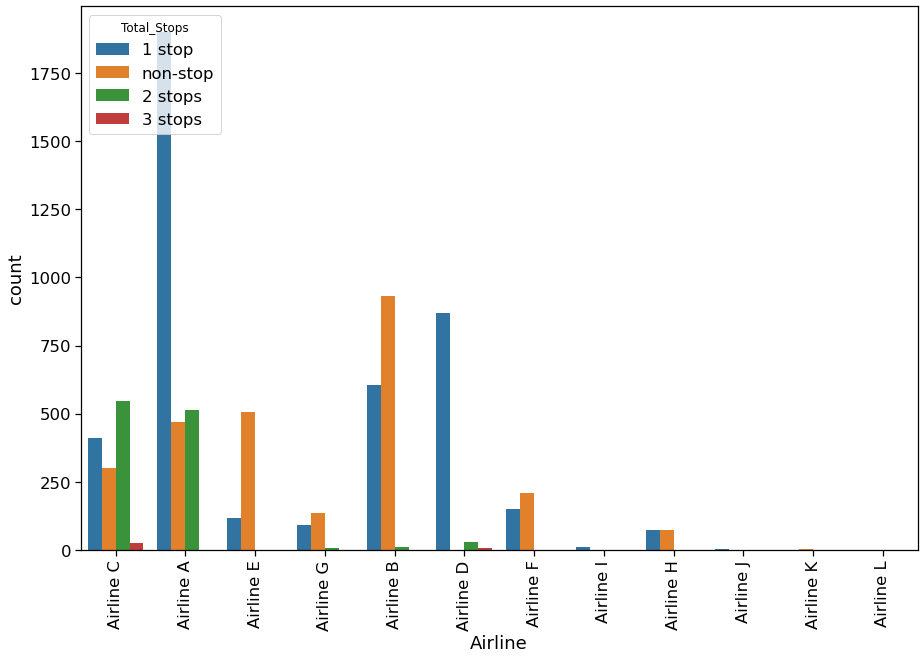

In [291]:
plt.figure(figsize = (15, 10))
chart=sns.countplot(x='Airline',hue='Total_Stops',data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

- Maximum flights have one stop or two stops to reach to the destination.
- there are negligible Airlines that takes 2 stops and 3 stops to reach their destination.

### the data type of date_of_journey is object as we can see in info.so we will convert it into teimestamp

In [292]:
train['jou_day'] = pd.DatetimeIndex(train['Date_of_Journey']).day
train['jou_mon'] = pd.DatetimeIndex(train['Date_of_Journey']).month

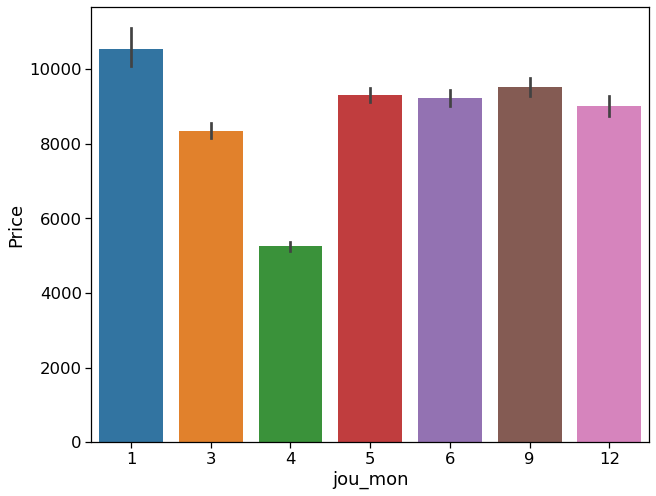

In [293]:
plt.figure(figsize = (10, 8))
sns.barplot(x='jou_mon',y='Price',data=train)

In [294]:
train_new['Price'].resample('MS').mean()

Date_of_Journey
2019-01-01    2.109616e+06
2019-02-01             NaN
2019-03-01    1.509211e+06
2019-04-01    3.298594e+05
2019-05-01    2.921255e+06
2019-06-01    1.944756e+06
2019-07-01             NaN
2019-08-01             NaN
2019-09-01    2.551492e+06
2019-10-01             NaN
2019-11-01             NaN
2019-12-01    1.652966e+06
Freq: MS, Name: Price, dtype: float64

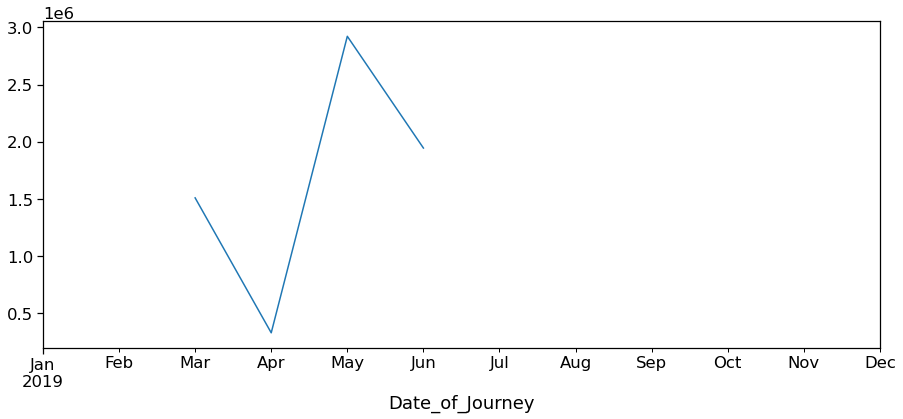

In [295]:
y.plot(figsize=(15, 6))
plt.show()

Text(0, 0.5, 'Price of ticket')

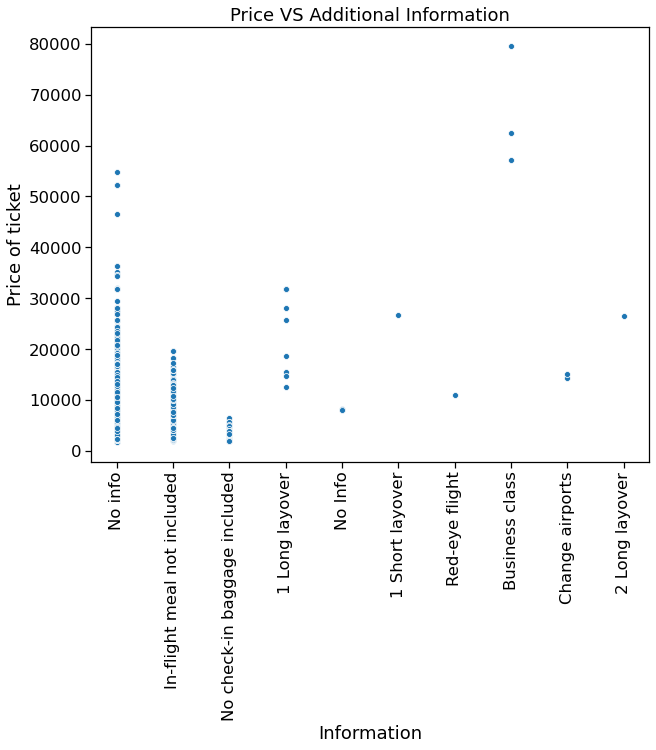

In [296]:
plt.figure(figsize = (10, 8))
plt.title('Price VS Additional Information')
sns.scatterplot(train['Additional_Info'], train['Price'],data=train)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

In [297]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
jou_day            0
jou_mon            0
dtype: int64

In [298]:
train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
jou_day                     int64
jou_mon                     int64
dtype: object

##### Date_of_Journey

In [299]:
# convert into the date time format
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])

In [300]:
train['Date_of_Journey'].nunique()

40

In [301]:
train["Journey_day"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [302]:
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [303]:
train['Date_of_Journey'].dt.day_name().value_counts()

Thursday     1730
Friday       1382
Wednesday    1192
Monday       1127
Tuesday       910
Saturday      905
Sunday        765
Name: Date_of_Journey, dtype: int64

In [304]:
train['Date_of_Journey'].nunique()

40

In [305]:
train['Date_of_Journey'].value_counts(sort =True, ascending=False)

2019-06-06    390
2019-05-18    385
2019-09-06    384
2019-12-06    379
2019-09-05    363
2019-05-21    351
2019-03-21    316
2019-05-15    314
2019-06-03    300
2019-05-27    293
2019-06-24    264
2019-06-15    255
2019-06-27    253
2019-01-06    250
2019-03-24    245
2019-03-06    243
2019-09-03    233
2019-03-27    227
2019-05-24    224
2019-03-03    211
2019-12-05    202
2019-01-05    201
2019-06-05    199
2019-01-04    195
2019-01-03    154
2019-03-15    122
2019-03-18    119
2019-12-03    102
2019-09-04     92
2019-06-04     80
2019-06-18     79
2019-03-04     79
2019-06-21     78
2019-04-15     72
2019-04-24     67
2019-03-05     65
2019-04-27     64
2019-04-21     59
2019-04-18     52
2019-12-04     50
Name: Date_of_Journey, dtype: int64

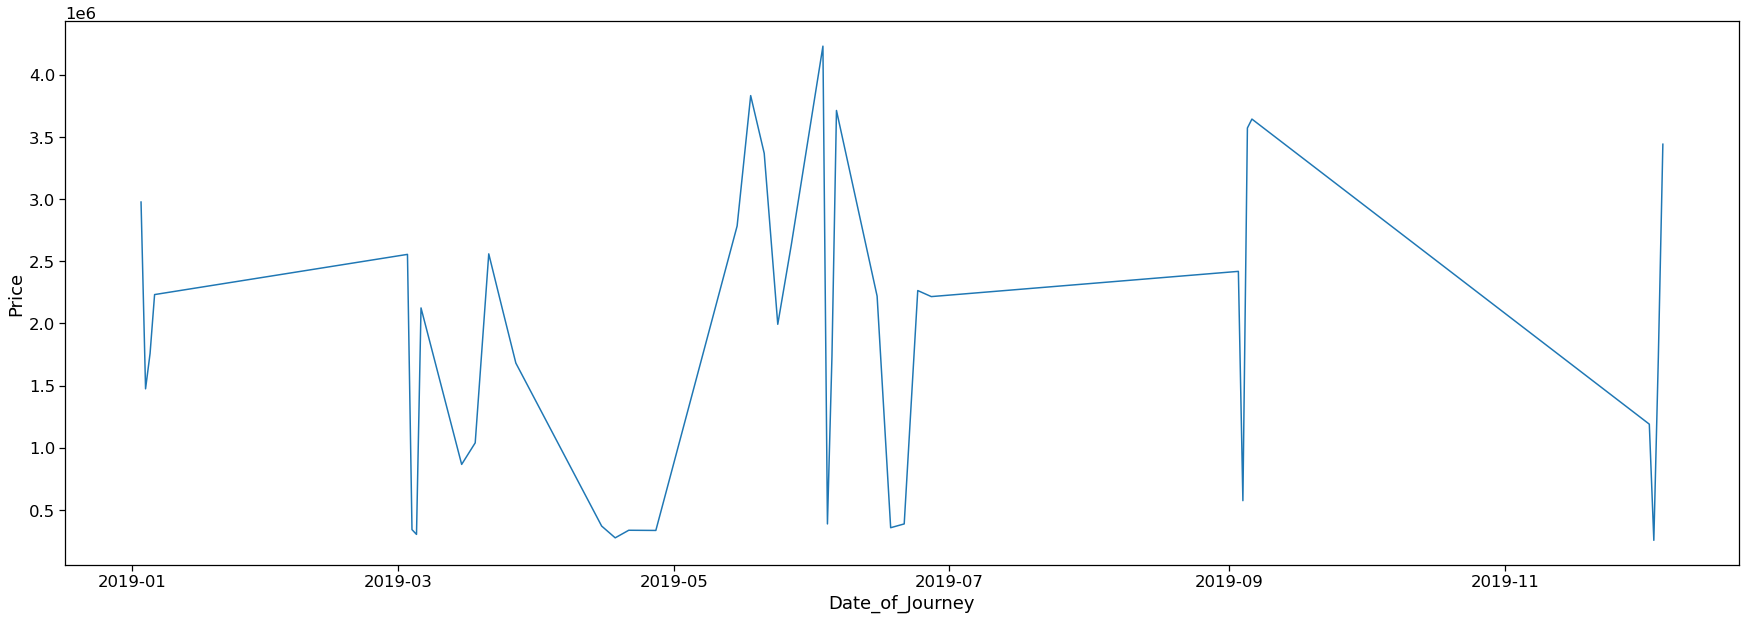

In [306]:
weekly_demand = train.groupby(['Date_of_Journey'])['Price'].sum()

plt.figure(figsize=(30,10))
sns.lineplot(x = weekly_demand.index, y = weekly_demand)

In [307]:
train['Journey_month'].nunique()

7

In [308]:
train['Journey_month'].value_counts(sort =True, ascending=False)

6     1898
3     1627
5     1567
9     1072
1      800
12     733
4      314
Name: Journey_month, dtype: int64

In [310]:
y = weekly_demand

In [311]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

### We have 40 weeks of data for the flight and maximum filghts deoarted on thursday, friday, tuesday and monday in the month Junuary, April, may and october and december

In [28]:
train["Additional_Info"].value_counts()

No info                         6250
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
No Info                            3
Business class                     3
Change airports                    2
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [29]:
train["Additional_Info"] = train["Additional_Info"].replace({'No Info': 'No info'})

In [30]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_mon,Journey_day,Journey_month
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480,6,12,6,12
1,Airline A,2019-06-18,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016,18,6,18,6
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879,18,5,18,5
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,5,6,5,6
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663,5,9,5,9


##### Dep_Time

In [31]:
# convert into the date time format
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'])

In [32]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [33]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_mon,Journey_day,Journey_month,Dep_hour,Dep_min
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,09:25 13 Jun,12h 45m,1 stop,No info,7480,6,12,6,12,20,40
1,Airline A,2019-06-18,Banglore,Delhi,BLR → DEL,22:00,3h 5m,non-stop,No info,8016,18,6,18,6,18,55
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,19:15,15h 25m,1 stop,No info,8879,18,5,18,5,3,50
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,5,6,5,6,20,0
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,12:00,5h 30m,1 stop,In-flight meal not included,9663,5,9,5,9,6,30


##### Arrival_Time

In [34]:
# convert into the date time format
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'])

In [35]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [36]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_mon,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,12h 45m,1 stop,No info,7480,6,12,6,12,20,40,9,25
1,Airline A,2019-06-18,Banglore,Delhi,BLR → DEL,3h 5m,non-stop,No info,8016,18,6,18,6,18,55,22,0
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,15h 25m,1 stop,No info,8879,18,5,18,5,3,50,19,15
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,12h 15m,1 stop,In-flight meal not included,9663,5,6,5,6,20,0,8,15
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,5h 30m,1 stop,In-flight meal not included,9663,5,9,5,9,6,30,12,0


In [37]:
train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_mon,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
8007,Airline A,2019-12-06,Kolkata,Banglore,CCU → BOM → BLR,22h 10m,1 stop,In-flight meal not included,7594,6,12,6,12,6,30,4,40
8008,Airline C,2019-09-06,Delhi,Cochin,DEL → GOI → BOM → COK,21h 15m,2 stops,No info,10651,6,9,6,9,22,0,19,15
8009,Airline A,2019-03-03,Delhi,Cochin,DEL → BOM → COK,20h 25m,1 stop,No info,17024,3,3,3,3,8,0,4,25
8010,Airline A,2019-05-18,Delhi,Cochin,DEL → BOM → COK,25h 5m,1 stop,In-flight meal not included,12373,18,5,18,5,11,30,12,35
8011,Airline A,2019-09-05,Kolkata,Banglore,CCU → DEL → BLR,27h 10m,1 stop,No info,13067,5,9,5,9,20,25,23,35


In [38]:
train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
jou_day                     int64
jou_mon                     int64
Journey_day                 int64
Journey_month               int64
Dep_hour                    int64
Dep_min                     int64
Arrival_hour                int64
Arrival_min                 int64
dtype: object

##### Duration

In [39]:
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [40]:
# Adding duration_hours and duration_mins list to train_data dataframe

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [41]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_mon,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,12h 45m,1 stop,No info,7480,6,12,6,12,20,40,9,25,12,45
1,Airline A,2019-06-18,Banglore,Delhi,BLR → DEL,3h 5m,non-stop,No info,8016,18,6,18,6,18,55,22,0,3,5
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,15h 25m,1 stop,No info,8879,18,5,18,5,3,50,19,15,15,25
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,12h 15m,1 stop,In-flight meal not included,9663,5,6,5,6,20,0,8,15,12,15
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,5h 30m,1 stop,In-flight meal not included,9663,5,9,5,9,6,30,12,0,5,30


##### Price

In [42]:
train['Price'].describe()

count     8011.000000
mean      9062.235426
std       4626.848090
min       1759.000000
25%       5277.000000
50%       8371.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

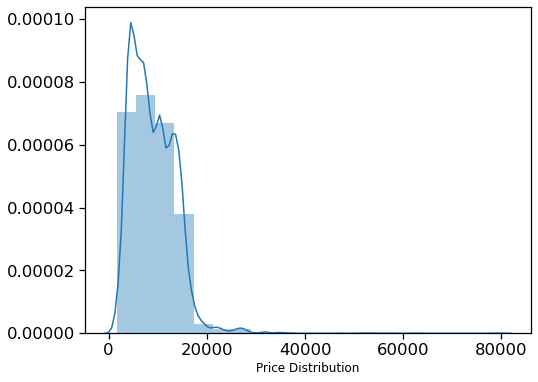

In [43]:
# distribution of Base Price variable
plt.figure(figsize=(8,6))
sns.distplot((train['Price'].values), bins=20, kde=True)
plt.xlabel('Price Distribution', fontsize=12)
plt.show()

- Range for base price is 4000  to 10000

In [44]:
train['Price'].value_counts()

10262    197
10844    168
7229     126
4804     110
4823      96
        ... 
10366      1
12648      1
6481       1
6477       1
4098       1
Name: Price, Length: 1632, dtype: int64

#### Categorical Variables

- Check the unique values for categorical variables
- Are there any missing values in the variables?
- Is there any variable with high cardinality/ sparsity?

In [45]:
train["Airline"].value_counts()

Airline A    2881
Airline B    1550
Airline C    1286
Airline D     906
Airline E     625
Airline F     360
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

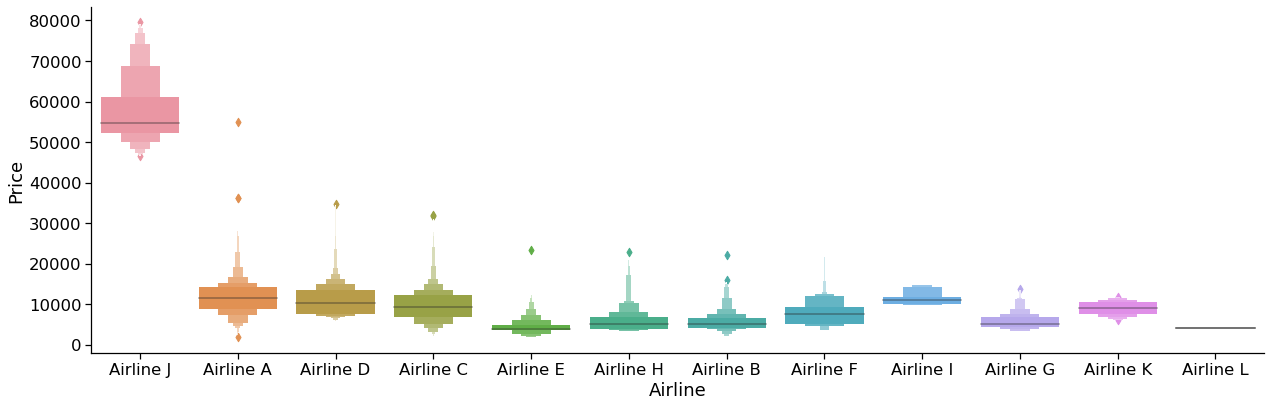

In [46]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [47]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


- From graph we can see that Airline J has the highest Price.

- There are more number of flights of Airline A.

- Airline I,Airline J, Airline K, Airline L have actually almost negligible flights.

In [48]:
# Airline
train["Airline"].replace({'Airline L':'Other','Airline K':'Other','Airline J':'Other','Airline I':'Other'},inplace=True)



##### Source

In [49]:
train["Source"].value_counts()

Delhi       3397
Kolkata     2152
Banglore    1650
Mumbai       523
Chennai      289
Name: Source, dtype: int64

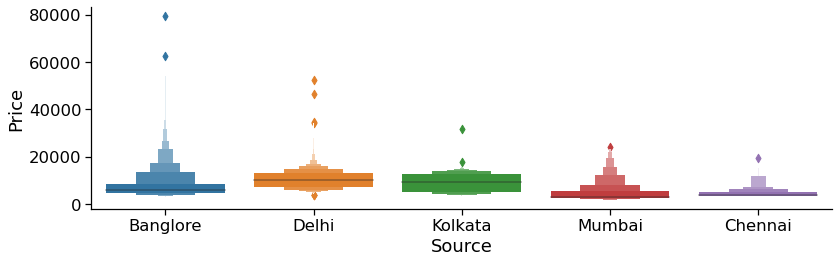

In [50]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [51]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


##### Destination

In [52]:
train["Destination"].value_counts()

Cochin       3397
Banglore     2152
Delhi         956
New Delhi     694
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

In [53]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [54]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'jou_day',
       'jou_mon', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

##### Total_Stops

In [55]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [56]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_mon,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Airline C,2019-12-06,Delhi,Cochin,DEL → MAA → COK,12h 45m,1,No info,7480,6,12,6,12,20,40,9,25,12,45
1,Airline A,2019-06-18,Banglore,Delhi,BLR → DEL,3h 5m,0,No info,8016,18,6,18,6,18,55,22,0,3,5
2,Airline C,2019-05-18,Delhi,Cochin,DEL → BOM → COK,15h 25m,1,No info,8879,18,5,18,5,3,50,19,15,15,25
3,Airline A,2019-06-05,Kolkata,Banglore,CCU → BOM → BLR,12h 15m,1,In-flight meal not included,9663,5,6,5,6,20,0,8,15,12,15
4,Airline A,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,5h 30m,1,In-flight meal not included,9663,5,9,5,9,6,30,12,0,5,30


In [57]:
(train.groupby(['Total_Stops', 'Duration_hours'])['Airline'].count())

Total_Stops  Duration_hours
0            1                  468
             2                 1802
             3                  360
1            3                   22
             4                  170
                               ... 
3            26                   1
             27                   1
             30                   2
             35                   3
             38                  10
Name: Airline, Length: 81, dtype: int64

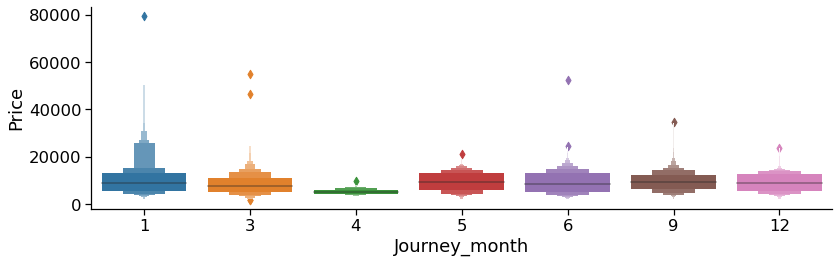

In [58]:
# Dep Time vs Price

sns.catplot(y = 'Price', x = 'Journey_month', data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [59]:
train['Total_Stops'].value_counts()

1    4235
0    2630
2    1112
3      34
Name: Total_Stops, dtype: int64

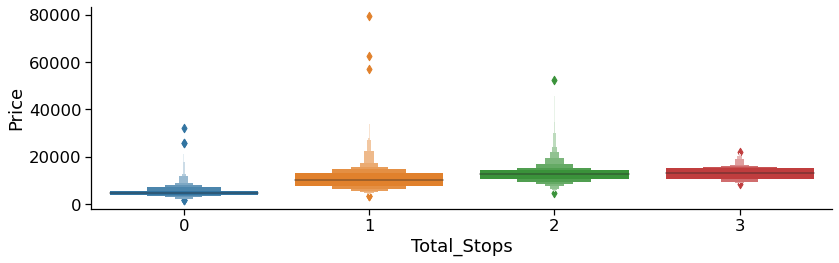

In [60]:
# Total_Stops vs Price

sns.catplot(y = 'Price', x = 'Total_Stops', data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [61]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'jou_day',
       'jou_mon', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [62]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([Airline,train,Source, Destination], axis = 1)

In [63]:
data_train.head()

,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,...,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0,0,0,0,0,...,45,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,25,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,15,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,30,0,0,1,0,0,0,0,0,0


In [64]:
data_train['Journey_month'].value_counts()

6     1898
3     1627
5     1567
9     1072
1      800
12     733
4      314
Name: Journey_month, dtype: int64

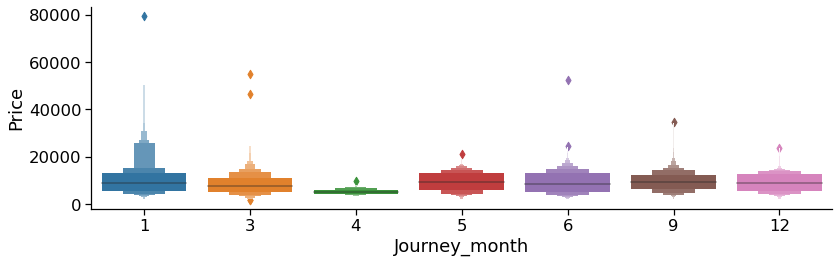

In [65]:
# Journey_month vs Price

sns.catplot(y = 'Price', x = 'Journey_month', data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [66]:
data_train['Additional_Info'].value_counts()

No info                         6253
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
Change airports                    2
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [67]:
data_train.columns

Index(['Airline_Airline B', 'Airline_Airline C', 'Airline_Airline D',
       'Airline_Airline E', 'Airline_Airline F', 'Airline_Airline G',
       'Airline_Airline H', 'Airline_Airline I', 'Airline_Airline J',
       'Airline_Airline K', 'Airline_Airline L', 'Airline', 'Date_of_Journey',
       'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'jou_day', 'jou_mon', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

### Remove unnecessary coloumns

- 1. Route and Total stops contains same information, so we will remove Route feature
- 2. Additional_Info contains almost 80% no_info
- 3. we will delete Airline, Source, Destination as we created its dummy variables.
- 4. as we created duration_hours and duration_mins list to train_data dataframe, we will remove Duration feature too


In [68]:
data_train.drop(["Route", "Additional_Info", "Airline", "Source", "Destination", "Duration","Date_of_Journey" ], axis = 1, inplace = True)

In [69]:
data_train.head()

,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,...,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0,0,0,0,0,...,45,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,25,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,15,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,30,0,0,1,0,0,0,0,0,0


# Test Data

In [70]:
test_data = pd.read_csv('test.csv')

In [71]:
test_data.shape

(2671, 10)

In [72]:
test_data.dropna(inplace = True)

In [73]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [74]:
test_data['Airline'].value_counts()

Airline A    968
Airline B    503
Airline C    465
Airline D    290
Airline E    193
Airline F    119
Airline G     84
Airline H     48
Airline I      1
Name: Airline, dtype: int64

In [75]:
test_data.shape

(2671, 10)

In [76]:
# Preprocessing same as training data that we have done

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [77]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Airline B,Delhi,Cochin,1,27,3,4,55,16,10,11,15
1,Airline E,Kolkata,Banglore,0,27,5,22,20,0,40,2,20
2,Airline C,Kolkata,Banglore,2,6,6,5,50,20,25,14,35
3,Airline A,Banglore,New Delhi,1,3,6,9,45,14,25,4,40
4,Airline B,Delhi,Cochin,1,15,6,16,0,1,30,9,30


## Preprocessing of Categorical Variables

In [78]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline B,...,Airline I,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,27,3,4,55,16,10,11,15,1,...,0,0,1,0,0,1,0,0,0,0
1,0,27,5,22,20,0,40,2,20,0,...,0,0,0,1,0,0,0,0,0,0
2,2,6,6,5,50,20,25,14,35,0,...,0,0,0,1,0,0,0,0,0,0
3,1,3,6,9,45,14,25,4,40,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15,6,16,0,1,30,9,30,1,...,0,0,1,0,0,1,0,0,0,0


In [79]:
data_train.columns

Index(['Airline_Airline B', 'Airline_Airline C', 'Airline_Airline D',
       'Airline_Airline E', 'Airline_Airline F', 'Airline_Airline G',
       'Airline_Airline H', 'Airline_Airline I', 'Airline_Airline J',
       'Airline_Airline K', 'Airline_Airline L', 'Total_Stops', 'Price',
       'jou_day', 'jou_mon', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [80]:
data_train.shape, test_data.shape

((8011, 32), (2671, 12))

In [81]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline B', 'Airline C', 'Airline D', 'Airline E', 'Airline F',
       'Airline G', 'Airline H', 'Airline I', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

# Training data

- There are more number of flights of Airline A.

- Airline J, Airline K, Airline L have actually almost negligible flights.

In [82]:
# Remove unnecessary coloumns
data_train.drop(["Airline_Airline J", "Airline_Airline K", "Airline_Airline L"], axis = 1, inplace = True)
#test_data.drop(["Airline_Airline J", "Airline_Airline K", "Airline_Airline L"], axis = 1, inplace = True)

In [83]:
y = data_train['Price']
y.head()

0    7480
1    8016
2    8879
3    9663
4    9663
Name: Price, dtype: int64

In [84]:
data_train.columns

Index(['Airline_Airline B', 'Airline_Airline C', 'Airline_Airline D',
       'Airline_Airline E', 'Airline_Airline F', 'Airline_Airline G',
       'Airline_Airline H', 'Airline_Airline I', 'Total_Stops', 'Price',
       'jou_day', 'jou_mon', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [85]:
X = data_train[['Airline_Airline B', 'Airline_Airline C', 'Airline_Airline D',
       'Airline_Airline E', 'Airline_Airline F', 'Airline_Airline G',
       'Airline_Airline H', 'Airline_Airline I', 'Total_Stops','Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Total_Stops,Journey_day,...,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0,0,0,1,6,...,45,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,18,...,5,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,18,...,25,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,5,...,15,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,5,...,30,0,0,1,0,0,0,0,0,0


In [86]:
data_train.shape, data_test.shape

((8011, 29), (2671, 26))

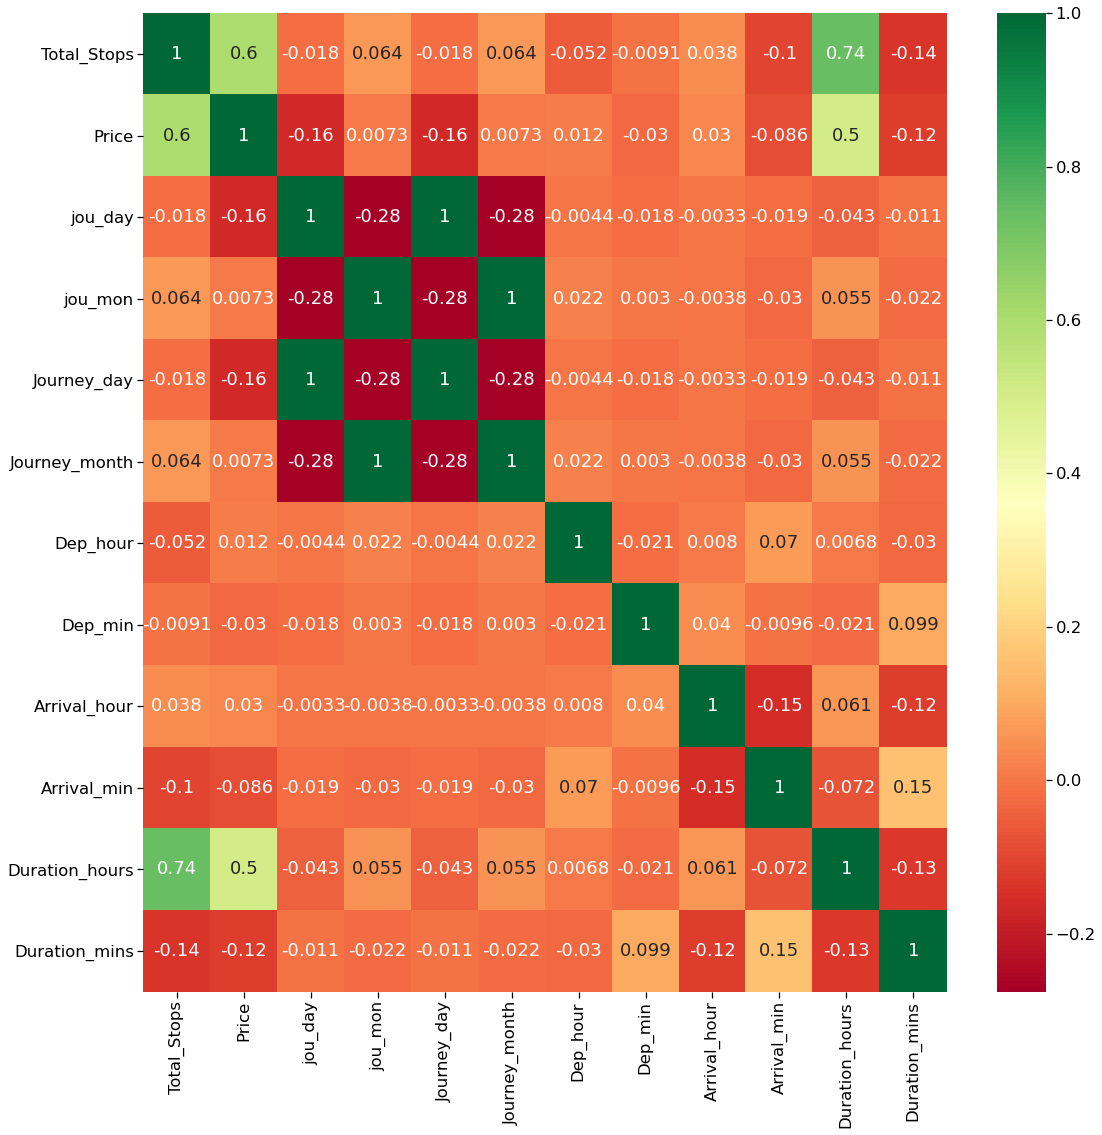

In [87]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [89]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
y_pred = reg_rf.predict(X_test)

In [91]:
reg_rf.score(X_train, y_train)

0.9590092902174755

In [92]:
reg_rf.score(X_test, y_test)

0.7550522433833123

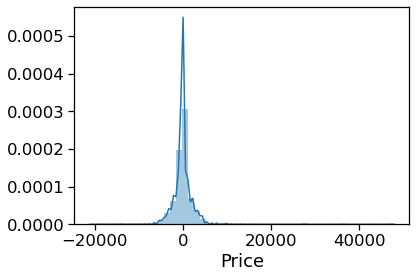

In [93]:
sns.distplot(y_test-y_pred)
plt.show()

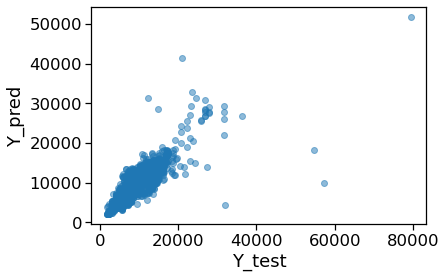

In [94]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [95]:
from sklearn import metrics

In [96]:
# finding the Errors 

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1246.7967818417717
MSE: 5791646.366365606
RMSE: 2406.5839620436277


In [97]:
metrics.r2_score(y_test, y_pred)

0.7550522433833123

In [98]:
## Hyperparameter Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [101]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [102]:
rf_random = RandomizedSearchCV( estimator = reg_rf , param_distributions= random_grid , scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [103]:
rf_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [104]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [105]:
prediction = rf_random.predict(X_test)

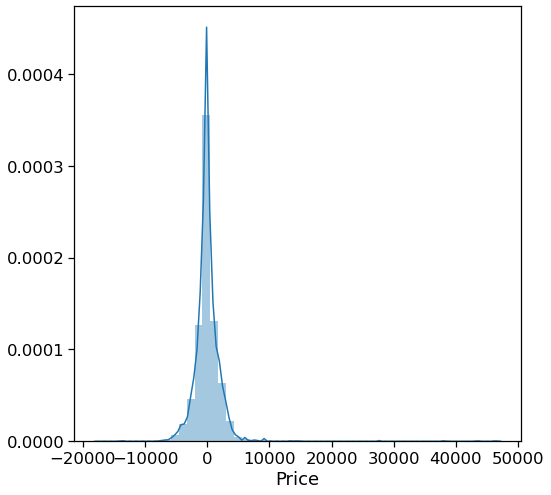

In [106]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

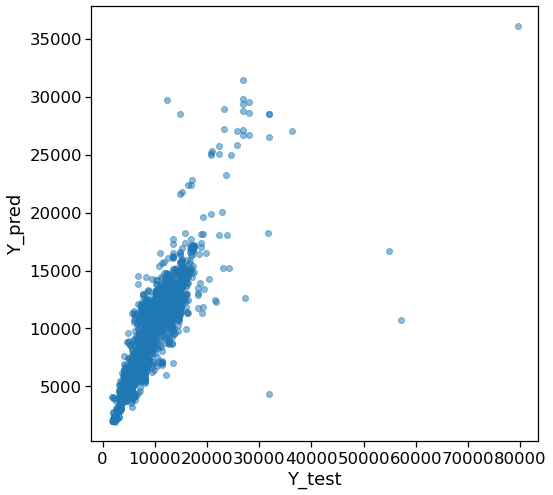

In [107]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1262.97311204549
MSE: 5888460.423089009
RMSE: 2426.6150133651213


In [109]:
print("R2 Score of Our Model is : ")
print()
metrics.r2_score(y_test, prediction)

R2 Score of Our Model is : 



0.750957658786249

In [110]:
train_pred = rf_random.predict(data_test)
final_df=pd.DataFrame({ 'Price': train_pred })
final_df.to_csv('final_dataset_rf.csv',index=False)